In [1]:
import speech_recognition as sr
import numpy as np
import os
from matplotlib.figure import Figure
from mpl_toolkits.axisartist.axislines import Subplot 
import dtw
import matplotlib.pyplot as plt
import librosa
import IPython.display
%matplotlib inline
from IPython.display import Image

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
r = sr.Recognizer() 

In [3]:
dirListing = os.listdir("C:\\Users\win10\Documents\\Speech_recognition\\.ipynb_checkpoints")
editFiles = []
for item in dirListing:
    if ".wav" in item:
        editFiles.append("C:\\Users\\win10\\Documents\\Speech_recognition"+'\\'+item)
print(editFiles)

['C:\\Users\\win10\\Documents\\Speech_recognition\\1.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\10.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\2.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\3.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\4.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\5.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\6.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\7.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\8.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\9.wav']


In [4]:
my_audio = []
audio = []
for i in range(10):
    path = editFiles[i]
    my_audio.append(sr.AudioFile(path))
    with my_audio[i] as source:
        audio.append(r.record(source))

In [5]:
for i in range(10):
    r.recognize_google(audio[i], language="fa_IR")
r.recognize_google(audio[0], language="fa_IR")

'فرزاد فروزانفر'

C:\Users\win10\AppData\Local\Temp/ipykernel_10444/785238775.py:24: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01016537 -0.00968971
 -0.0098548 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(y,sr)
C:\Users\win10\AppData\Local\Temp/ipykernel_10444/785238775.py:24: FutureWarning: Pass y=[0.         0.         0.         ... 0.00133326 0.00127462 0.0019043 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(y,sr)
C:\Users\win10\AppData\Local\Temp/ipykernel_10444/785238775.py:24: FutureWarning: Pass y=[0.         0.         0.         ... 0.00343474 0.00318114 0.00321193], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(y,sr)
C:\Users\win10\AppData\Local\Temp/ipykernel_10444/785238775.py:24: Fu

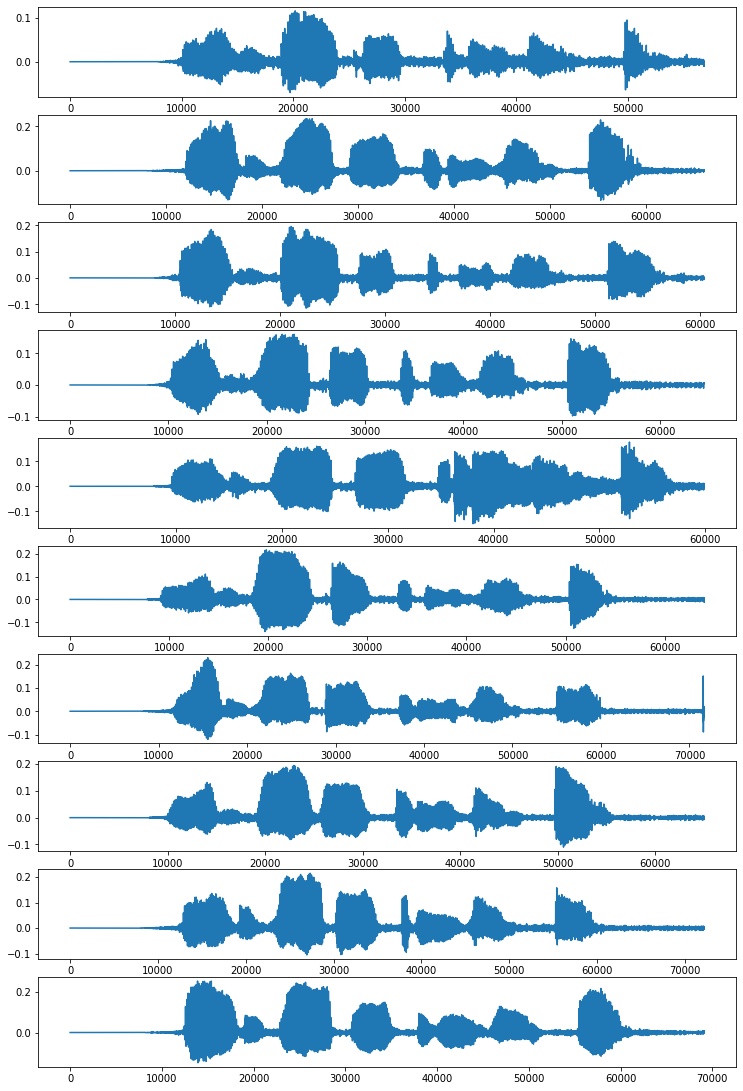

In [6]:
train_audio = []
sr_arr = []
mfcc_train = []
for i in range(10):
    
    #define variable to save data and rate audio
    path = editFiles[i]
    y, sr = librosa.load(path)
    
    #resize each figure to show better
    fig = plt.gcf()
    fig.set_size_inches(12.5, 19.5)
    
    #show matplotlib speek
    plt.subplot(10, 1, i+1)
    plt.plot(y)
    IPython.display.Audio(data=y, rate=sr)
    
    #Add data to train list:
    train_audio.append(y)
    sr_arr.append(sr)
    
    #Convert the data to mfcc:
    mfccTest = librosa.feature.mfcc(y,sr)
    mfcc_train.append(mfccTest)
    

In [7]:
print(mfcc_train)

[array([[-804.969    , -804.969    , -804.969    , ..., -471.5347   ,
        -470.2449   , -469.56827  ],
       [   0.       ,    0.       ,    0.       , ...,  114.53119  ,
         115.10744  ,  108.25989  ],
       [   0.       ,    0.       ,    0.       , ...,  -41.695644 ,
         -19.549606 ,    3.9144435],
       ...,
       [   0.       ,    0.       ,    0.       , ...,    1.8123809,
           1.5064452,    1.60008  ],
       [   0.       ,    0.       ,    0.       , ...,  -10.275194 ,
          -2.6021423,   -3.227145 ],
       [   0.       ,    0.       ,    0.       , ...,  -12.731357 ,
          -8.512705 ,   -6.586806 ]], dtype=float32), array([[-7.19173828e+02, -7.19173828e+02, -7.19173828e+02, ...,
        -4.88549805e+02, -4.93102051e+02, -5.22602173e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.42289307e+02,  1.41130432e+02,  1.23947197e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.74366093e+0

In [8]:
# Remove mean and normalize each column of MFCC 

import copy
def preprocess_mfcc(mfcc_test):
    mfcc_cp = copy.deepcopy(mfcc_test)
    for i in range(len(mfcc_test[1])):
        mfcc_cp[:,i] = mfcc_test[:,i] - np.mean(mfcc_test[:,i])
        mfcc_cp[:,i] = mfcc_cp[:,i]/np.max(np.abs(mfcc_cp[:,i]))
    return mfcc_cp
mfcc_final = []
for i in range(10):
    mfcc_final.append(preprocess_mfcc(mfcc_train[i]))
    
mfcc_final

[array([[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [ 0.05263158,  0.05263158,  0.05263158, ...,  0.28771755,
          0.28936985,  0.27299157],
        [ 0.05263158,  0.05263158,  0.05263158, ..., -0.05554768,
         -0.00724249,  0.04311202],
        ...,
        [ 0.05263158,  0.05263158,  0.05263158, ...,  0.04004916,
          0.03913818,  0.03801333],
        [ 0.05263158,  0.05263158,  0.05263158, ...,  0.01349006,
          0.0300881 ,  0.02737865],
        [ 0.05263158,  0.05263158,  0.05263158, ...,  0.00809332,
          0.01706876,  0.01997711]], dtype=float32),
 array([[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [ 0.05263158,  0.05263158,  0.05263158, ...,  0.3368195 ,
          0.33171284,  0.28290606],
        [ 0.05263158,  0.05263158,  0.05263158, ...,  0.01888263,
          0.01672084,  0.02817098],
        ...,
        [ 0.05263158,  0.05263158,  0.0

C:\Users\win10\AppData\Local\Temp/ipykernel_10444/1072777795.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06607325 -0.07110196
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(yTest,srTest)


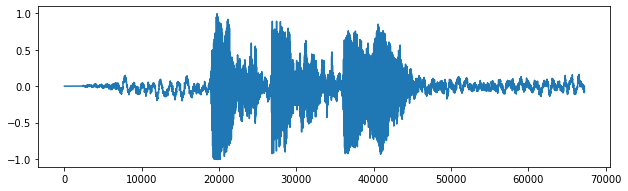

In [9]:
# add test audio
fig = plt.gcf()
fig.set_size_inches(10.25, 2.95)
yTest, srTest = librosa.load('Forouzanfar.wav')
plt.plot(yTest)

#Convert the data to mfcc:
mfccTest = librosa.feature.mfcc(yTest,srTest)
mfccTest = preprocess_mfcc(mfccTest)

In [10]:
len(mfcc_final[1])

20

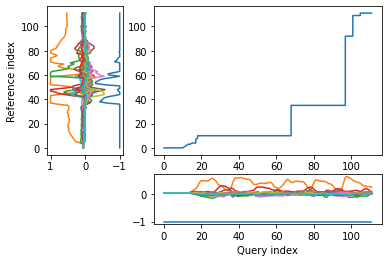

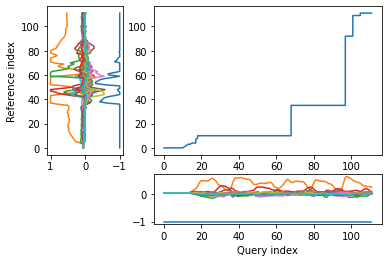

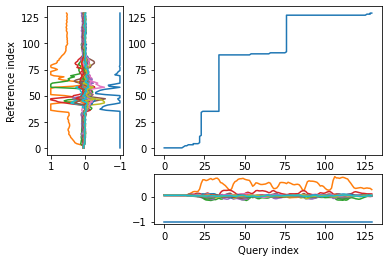

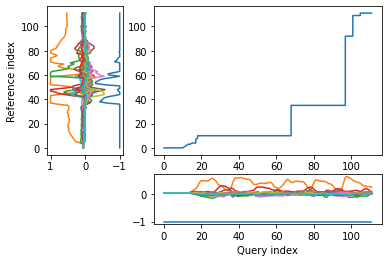

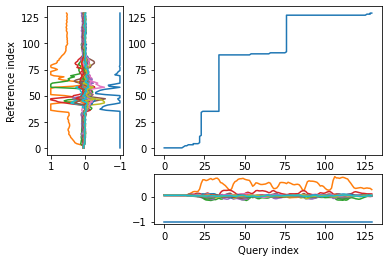

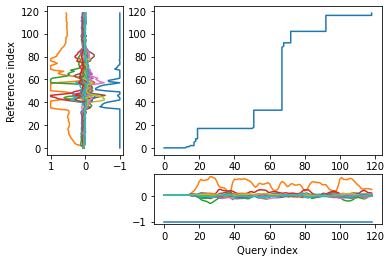

ValueError: negative dimensions are not allowed

In [14]:
# have assembled our testing data and training data
from dtw import *

window_size = []
dists = []
dists_secondary = []
for i in range(len(mfcc_final)):
    window_elemnts = len(mfcc_final[i][-1])
    dist = np.zeros(mfccTest.shape[1] - window_elemnts)
    window_size.append(window_elemnts)
    dists.append(dist)
    
    for j in range(len(dists)):
        mfcci = mfccTest[:,j:j+window_size[j]]
        dists_temp = dtw(mfcc_final[j].T, mfcci.T,keep_internals=True)
        dists_secondary.append(dists_temp)
           
    
    dists_secondary[j].plot(type="threeway")
    
#plt.plot(dists_temp)

print(dists_secondary[1])


    

In [17]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
temp = []
for i in range(len(mfcc_final)):
    for j in range(len(mfcc_final[i])):
        temp.append(dtw.distance(mfcc_final[i][i], mfcc_final[i][j]))
    path_between_my_voice = np.array(temp)
    

path_between_my_voice = np.reshape(path_between_my_voice,(10,20))


print(path_between_my_voice)

[[ 0.         14.51212627 10.48691891 12.08489856 10.918223   11.04004757
  10.49718231 11.06988657 11.01513179 11.05877812 11.06544811 11.05983824
  10.73383921 10.80168313 10.8926791  10.85193123 11.03183731 11.00672462
  10.99998992 10.75879985]
 [16.68817576  0.          5.4976873   3.4217487   4.96677408  4.72119182
   4.84914932  4.97746451  5.08196824  4.64270647  4.73337254  4.98263259
   5.23411944  5.24100296  4.83613298  5.15725853  5.15675167  5.38939779
   5.11839531  5.01657879]
 [10.61108541  4.87335942  0.          1.49883665  0.56062755  0.75023538
   0.51523294  0.85426993  0.66998672  0.83409535  0.87923984  0.88862994
   0.60619349  0.81438515  0.81802331  0.75954035  0.88085297  0.79628957
   0.93877979  0.70221774]
 [12.78291704  2.82011485  1.60193853  0.          0.92394652  0.68876874
   1.30469158  0.81642395  0.85564185  0.89950062  0.67529013  0.75223491
   1.16747173  1.21068398  1.1141767   1.15338228  0.9853926   1.12474074
   0.73693504  1.30687344]
 [10

In [18]:
temp = []
for i in range(len(mfcc_final)):
    for j in range(len(mfcc_final[i])):
        temp.append(dtw.distance(mfcc_final[i][i], mfccTest[j]))
    path_between_me_aother_voice = np.array(temp)
    
path_between_me_aother_voice = np.reshape(path_between_me_aother_voice,(10,20))


print(path_between_me_aother_voice)

[[ 1.95458156 18.41929793 13.41758138 12.68434522 12.07452306 11.66885025
  11.48538171 11.59225321 11.35781982 11.91315629 11.36453944 11.80328057
  11.70784228 12.0882554  11.3571891  11.69612894 11.21042769 11.51303564
  11.38299588 11.48959786]
 [15.60544741  1.84126067  2.21074786  2.63473333  3.3640977   3.66128866
   4.99696754  3.71876583  4.53736387  3.11257733  4.91254493  4.3311812
   4.87118528  3.66851964  5.30884354  3.75382799  5.50302842  4.95192481
   5.33411059  5.34045496]
 [ 9.63685202  6.87327426  2.64892023  2.01527652  0.78886705  0.72661513
   0.73656995  0.53289622  0.63417303  0.93938732  0.40416362  0.73773432
   0.49206097  0.78088203  0.51757957  0.70728744  0.39763513  0.5677458
   0.48645432  0.57361004]
 [12.30243413  5.07111247  1.98012826  1.65597039  1.01652719  1.52979331
   1.58948738  1.07269683  1.64261673  0.94170546  1.34781094  0.82033781
   0.94730567  0.65254524  1.49092414  0.96208203  1.60034261  1.08775583
   1.45094721  1.17660258]
 [10.5